In [1]:
from investesg import InvestESG
import numpy as np

# No ESG Invest; No preference for ESG; Risk free market

In [2]:
env = InvestESG(company_attributes=[{'capital':16,'climate_risk_exposure':0.01,'beta':0},
                                    {'capital':16,'climate_risk_exposure':0.01,'beta':0},
                                    {'capital':16,'climate_risk_exposure':0.01,'beta':0}], 
                investor_attributes=[{'capital':5,'esg_preference':0.5},
                                     {'capital':5,'esg_preference':0.5},
                                     {'capital':5,'esg_preference':0.5}],
                                    num_investors=3, initial_climate_event_probability=0.58,
                                    market_performance_baseline=1.05, market_performance_variance=0)

In [3]:
env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    # company 0 never does anything
    company_actions['company_0'] = 0
    company_actions['company_1'] = 0
    company_actions['company_2'] = 0
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    # mask such that investor 0 only invests in company 0
    investor_actions['investor_0'] = [1, 0, 0]
    investor_actions['investor_1'] = [0, 1, 0]
    investor_actions['investor_2'] = [0, 0, 1]
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

<Figure size 640x480 with 0 Axes>

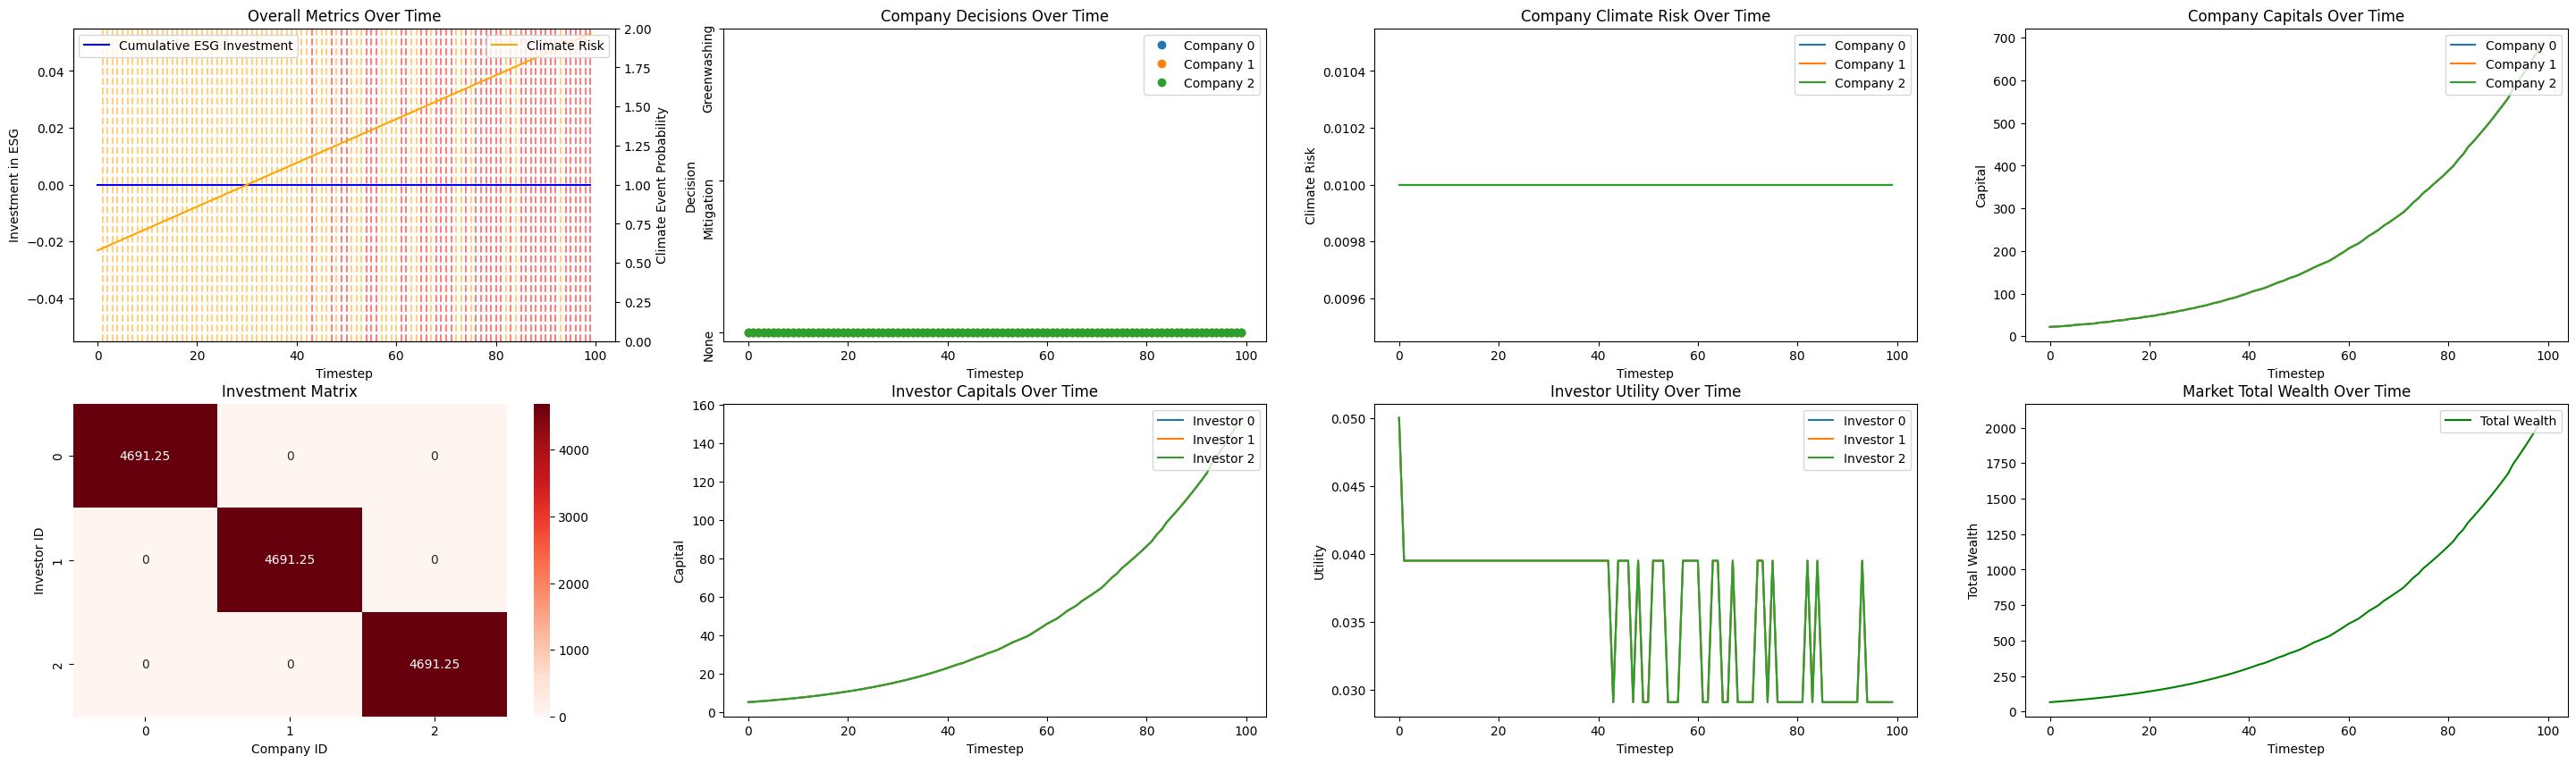

In [4]:
env.render()
env.fig

In [8]:
env.history['climate_risk']

[0.58,
 0.594,
 0.608,
 0.622,
 0.636,
 0.6499999999999999,
 0.6639999999999999,
 0.6779999999999999,
 0.692,
 0.706,
 0.72,
 0.734,
 0.748,
 0.762,
 0.776,
 0.7899999999999999,
 0.8039999999999999,
 0.818,
 0.832,
 0.846,
 0.86,
 0.8739999999999999,
 0.8879999999999999,
 0.9019999999999999,
 0.9159999999999999,
 0.9299999999999999,
 0.944,
 0.958,
 0.972,
 0.986,
 1.0,
 1.014,
 1.028,
 1.042,
 1.056,
 1.0699999999999998,
 1.084,
 1.0979999999999999,
 1.112,
 1.126,
 1.1400000000000001,
 1.154,
 1.168,
 1.182,
 1.196,
 1.21,
 1.224,
 1.238,
 1.252,
 1.266,
 1.28,
 1.294,
 1.3079999999999998,
 1.322,
 1.3359999999999999,
 1.35,
 1.3639999999999999,
 1.3780000000000001,
 1.392,
 1.4060000000000001,
 1.42,
 1.434,
 1.448,
 1.462,
 1.476,
 1.49,
 1.504,
 1.518,
 1.532,
 1.5459999999999998,
 1.56,
 1.5739999999999998,
 1.588,
 1.6019999999999999,
 1.616,
 1.63,
 1.6440000000000001,
 1.658,
 1.6720000000000002,
 1.686,
 1.7000000000000002,
 1.714,
 1.7280000000000002,
 1.742,
 1.755999999999

# One Company Invest in ESG every ten periods; No preference for ESG; Risk free market

<Figure size 640x480 with 0 Axes>

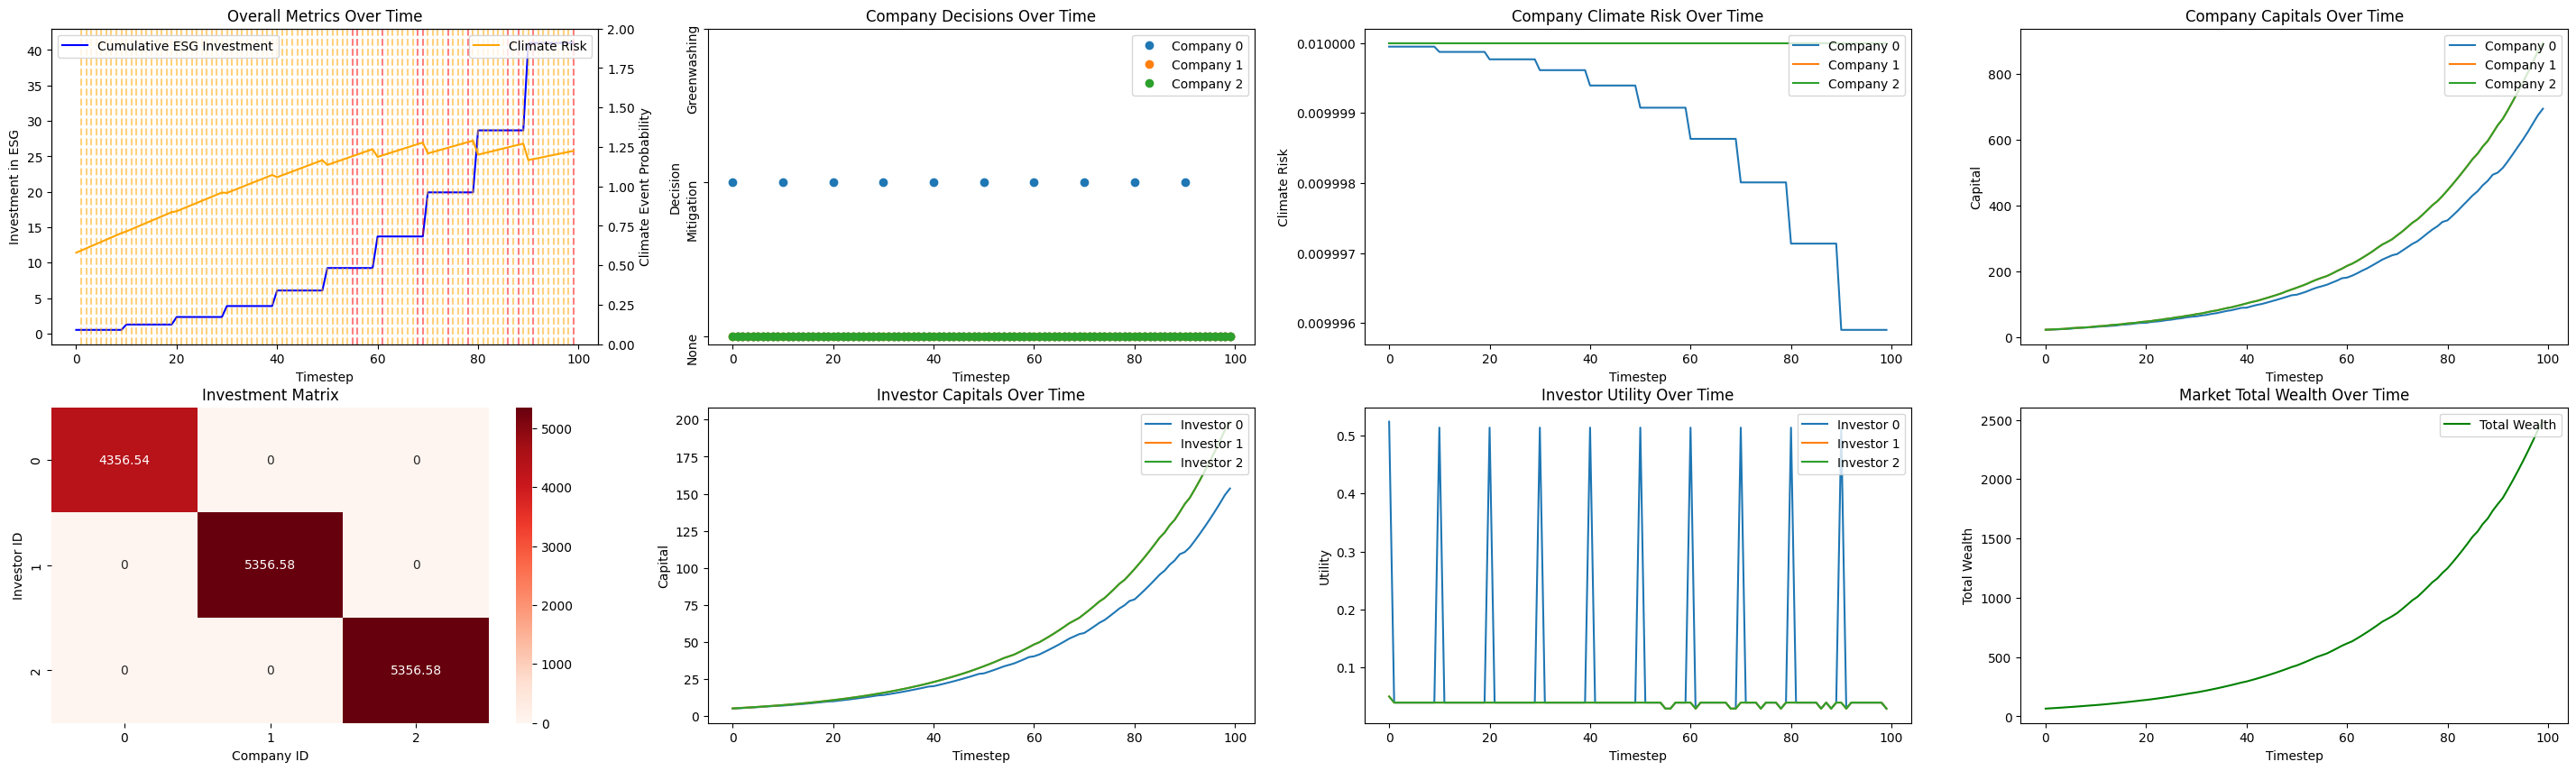

In [5]:
env = InvestESG(company_attributes=[{'capital':16,'climate_risk_exposure':0.01,'beta':0},
                                    {'capital':16,'climate_risk_exposure':0.01,'beta':0},
                                    {'capital':16,'climate_risk_exposure':0.01,'beta':0}], 
                investor_attributes=[{'capital':5,'esg_preference':0.5},
                                     {'capital':5,'esg_preference':0.5},
                                     {'capital':5,'esg_preference':0.5}],
                                    num_investors=3, initial_climate_event_probability=0.58,
                                    market_performance_baseline=1.05, market_performance_variance=0)

env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    # company invests in ESG every 10 steps, other companies never do
    if i % 10 == 0:
        company_actions['company_0'] = 1
    else:
        company_actions['company_0'] = 0

    company_actions['company_1'] = 0
    company_actions['company_2'] = 0
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    # mask such that investor 0 only invests in company 0
    investor_actions['investor_0'] = [1, 0, 0]
    investor_actions['investor_1'] = [0, 1, 0]
    investor_actions['investor_2'] = [0, 0, 1]
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

env.render()
env.fig

In [ ]:
env.history['market_total_wealth']

# One Company Invest in ESG every ten periods, the other one in greenwashing

<Figure size 640x480 with 0 Axes>

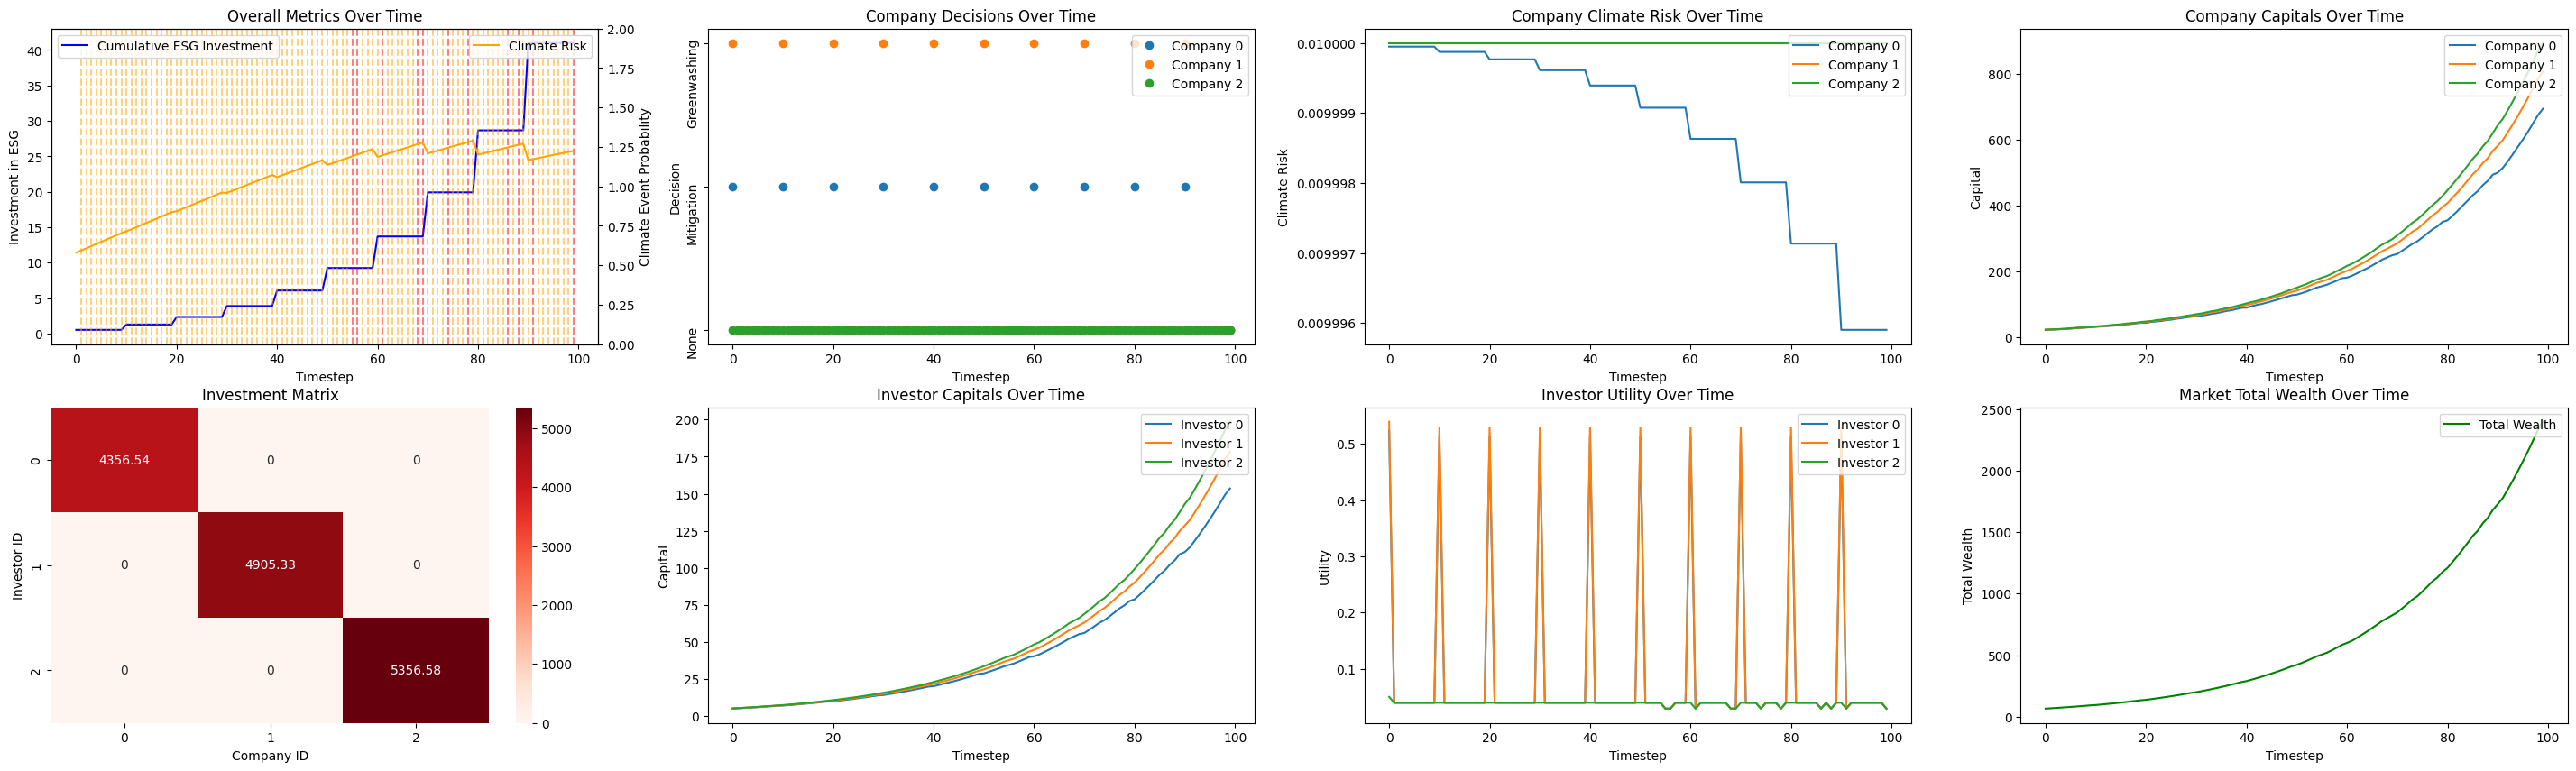

In [6]:
env = InvestESG(company_attributes=[{'capital':16,'climate_risk_exposure':0.01,'beta':0},
                                    {'capital':16,'climate_risk_exposure':0.01,'beta':0},
                                    {'capital':16,'climate_risk_exposure':0.01,'beta':0}], 
                investor_attributes=[{'capital':5,'esg_preference':0.5},
                                     {'capital':5,'esg_preference':0.5},
                                     {'capital':5,'esg_preference':0.5}],
                                    num_investors=3, initial_climate_event_probability=0.58,
                                    market_performance_baseline=1.05, market_performance_variance=0)

env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    # company invests in ESG every 10 steps, other companies never do
    if i % 10 == 0:
        company_actions['company_0'] = 1
    else:
        company_actions['company_0'] = 0

    # company spends on greenwashing
    if i % 10 == 0:
        company_actions['company_1'] = 2
    else:
        company_actions['company_1'] = 0

    company_actions['company_2'] = 0
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    # mask such that investor 0 only invests in company 0
    investor_actions['investor_0'] = [1, 0, 0]
    investor_actions['investor_1'] = [0, 1, 0]
    investor_actions['investor_2'] = [0, 0, 1]
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

env.render()
env.fig

In [ ]:
env.history['market_total_wealth'][-1]

# A pure Random Case

<Figure size 640x480 with 0 Axes>

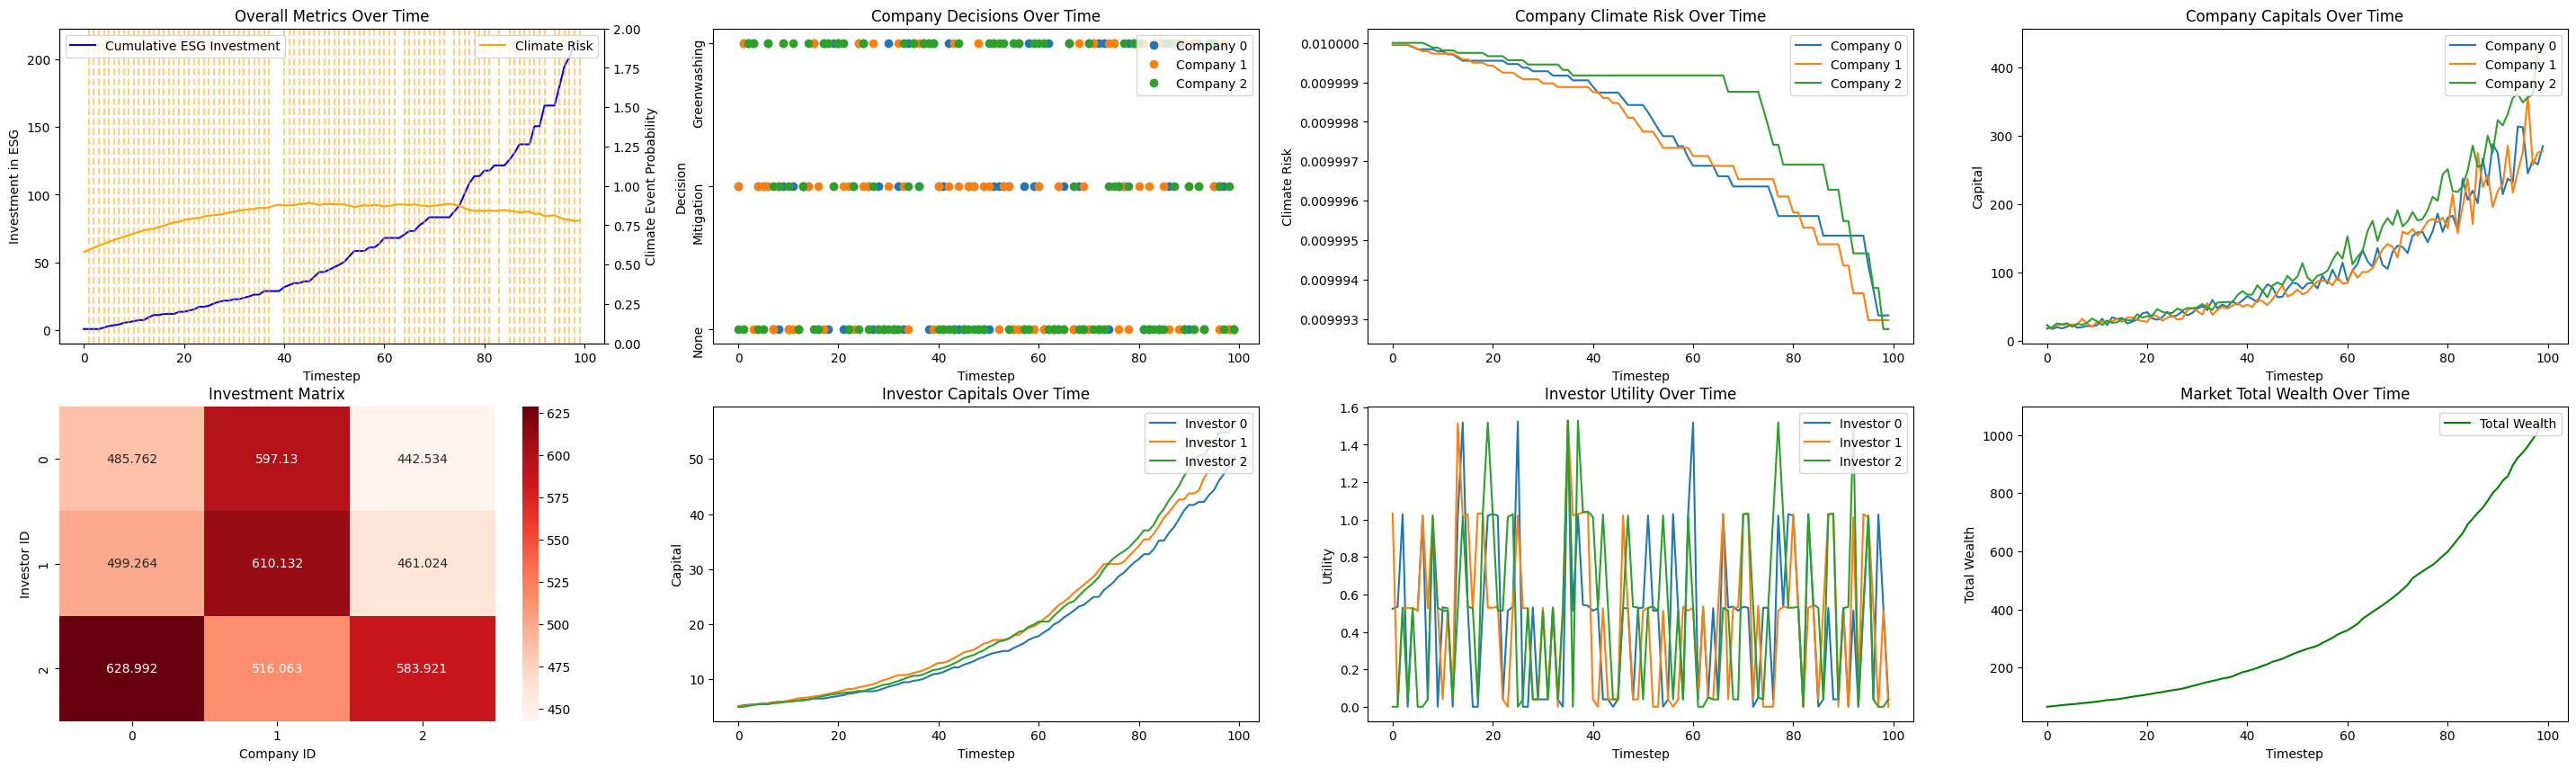

In [7]:
env = InvestESG(company_attributes=[{'capital':16,'climate_risk_exposure':0.01,'beta':0},
                                    {'capital':16,'climate_risk_exposure':0.01,'beta':0},
                                    {'capital':16,'climate_risk_exposure':0.01,'beta':0}], 
                investor_attributes=[{'capital':5,'esg_preference':0.5},
                                     {'capital':5,'esg_preference':0.5},
                                     {'capital':5,'esg_preference':0.5}],
                                    num_investors=3, initial_climate_event_probability=0.58,
                                    market_performance_baseline=1.05, market_performance_variance=0)

env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

env.render()
env.fig